<p><font size="4">  MOOC: Understanding queues</font></p>
<p><font size="4">  Python simulations</p>
<p><font size="4">  Week III: Discrete time Markov chains </p>

----------------------------

In this lab, we consider the Markov chain of the weather forecast example of the course. We check convergence of the probability $\pi(t)$ of the chain at time $t$ to a steady state distribution $\pi^*$, independently from the initial distribution $\pi(0)$ of the chain. We solve the load balance equations to get $\pi^*$.

-------------

Let us consider the Markov chain of the weather forecast example of the course. Recall that its states 1, 2 and 3 represent clear, cloudy and rainy states, and the transition matrix is

$$
P=
\begin{pmatrix}
0.7 & 0.3 & 0\\
0.3 & 0.5 & 0.2\\
0.1 & 0.4 & 0.5
\end{pmatrix}.
$$

**1)** Complete below the code of the function that generates trajectories of the Markov chain. The function inputs are the chain initial state $x0$, the transition matrix $P$ and final time index $T$. Its output will be a  trajectory $x$ of the chain observed between instants $0$ and $T$. Draw a trajectory of the evolution of the weather between time 0 and time $T=100$. 

In [5]:
%matplotlib inline              
from pylab import *          

In [17]:
P    = array([[.7, .3, 0], [.3, .5, .2], [.1, .4, .5]])

def X(x0,P=P,T=100):
    # Function X supplies a trajectory of the discrete Markov chain 
    # with initial state x0 and transition matrix P, till time T
    x        = [x0]
    for _ in range(T):
        #####################
        # supply the vector p of probabilities to transit to states
        # 1,2,3 from the last calculated state
        p = P[ x[len(x)-1]-1 ]
        #####################
        u = rand()
        if u<p[0]:
            x.append(1)
        elif u<p[0]+p[1]:
            x.append(2)
        else:
            x.append(3)
    return array(x)

V1 = mean(X(x0=1,T=10**4)) 

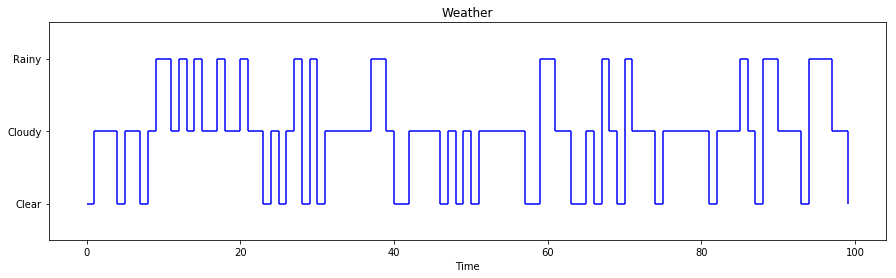

In [8]:
def step(x,y,Tmax=0,color='b'):
    # step function
    # plots a step function representing the number
    # of clients in the system at each instant
    if Tmax==0:
        Tmax = max(x)
    x = append(x,[Tmax])  # number of clients
    y = append(y,[y[-1]]) # instants of events
    for k in range(len(x)-1):
        vlines(x[k+1],y[k],y[k+1],color=color)
        hlines(y[k],x[k],x[k+1],color=color)
        
T = 100
x = X(x0=1)
figure(num=None, figsize=(15, 4))
step(range(T),x)
axis(ymin=0.5,ymax=3.5)
xlabel("Time")
title("Weather")
yticks([1.0,2.0,3.0], ["Clear","Cloudy","Rainy"]);

**2)** Run the following code that computes recursively the state probability vectors $\pi(t)$ at times $t=0,\ldots,100$. The state probability vectors can be computed recursively : $\pi(t+1)=\pi(t) P$. Check that, when changing the initial state $x0$, $\pi(t)$ still converges rapidly to the same asymptotic vector $\pi^*$ as $t$ increases.

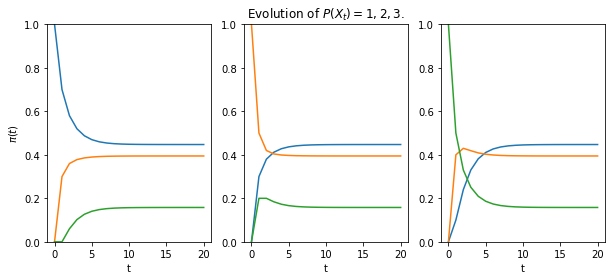

In [9]:
T = 20

def PI(pi0,P=P,T=T):
    # Function PI computes the state probability vectors
    # of the Markov chain until time T
    pi_ = array([pi0])
    for i in range(T):
        pi_ = vstack((pi_,pi_[-1] @ P))
    return pi_

def plot_PI(x0):
    # subplot(1,3,n+1) of successive states probabilities 
    # with initial state x0
    pi_0       = zeros(3)
    pi_0[x0-1] = 1
    pi_  = PI(pi_0)
    subplot(1,3,x0)
    plot(pi_)
    xlabel('t');axis(ymin=0,ymax=1)
    if x0==1: ylabel(r"$\pi(t)$")
    if x0==2: title("Evolution of $P(X_t)=1,2,3$.")

rcParams["figure.figsize"] = (10., 4.)
for x0 in range(1,4):
    plot_PI(x0)

**3)** To compute the steady state distribution $\pi^*=[\pi^*_1,\pi^*_2,\pi^*_3]$, we must solve the system of load balance equations $\pi^*=\pi^* P$ with the normalization condition $\pi^*_1+\pi^*_2+\pi^*_3=1$. The system of equations $\pi^*=\pi^* P$ is redundant : the third equation is a straightforward linear combination of the first two ones. Taking into account the normalization condition $\pi^*_1+\pi^*_2+\pi^*_3=1$ and discarding the third redundant equation in $\pi^*(P-I_3)=0$ yields a full rank system of equations. Complete the code below to solve this system and obtain the steady state ditribution. We will use the [solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve)
function from the **scipy.linalg** library.

In [14]:
from scipy.linalg import solve
####################
# complete the code to get the steady state distribution
# of the discrete time Markov chain
pi_ = solve([[-.3, .3, 0.1], [.3, -.5, .4], [1, 1, 1]],[0,0,1])
print("steady state distribution: pi* =",pi_)
####################
V2,V3 = pi_[0],pi_[1]

steady state distribution: pi* = [ 0.44736842  0.39473684  0.15789474]


# Your answers for the exercise

In [18]:
print("---------------------------\n"
      +"RESULTS SUPPLIED FOR LAB 3:\n"
      +"---------------------------")
results = ("V"+str(k) for k in range(1,4))
for x in results:
    try:
        print(x+" = {0:.2f}".format(eval(x)))
    except:
        print(x+": variable is undefined")   

---------------------------
RESULTS SUPPLIED FOR LAB 3:
---------------------------
V1 = 1.72
V2 = 0.45
V3 = 0.39
